<a href="https://colab.research.google.com/github/SoundaryaSarathi/MLCodes/blob/main/softsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 3**
Generate Test Datasets in Python with scikit-learn (sklearn), specifically to gener
ate blobs of points with a Gaussian distribution (n_samples=1000, n_features=2,

centers=2, cluster_std=1.05, random_state=2). Use all training data for those bi-
nary pair of points to learn two binary classifiers using linear SVM and nonlinear SVM (with Gaussian RBF kernel), and compare and discuss the performance

and efficiency of the linear SVM and nonlinear SVM methods.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


**Soft Linear SVMs** <br />
$d$ features, $n$ points <br />
data points: $(x_{i},y_{i})$<br />
Hinge loss for the $i^{th}$ datapoint $l_{i}=max(0,1-(y_{i}(w\cdot x_{i}+b))$<br />
Cost function to minimize $J=\frac{1}{2}||w||^{2}+\frac{1}{n}\sum_{i=1}^{n}l_{i}$  <br />
Note that $l_{i}$ is zero for $y_{i}f(x_{i})>1$ where $f(x_{i})=w\cdot x_{i}+b$<br /><br />
**Derivatives**: <br />
If $y_{i}\cdot f(x_{i})\geq 1 $,<br />
$\frac{\partial J}{∂ w_{j}}=w_{j}-\frac{1}{n}\sum_{y_{i}\cdot f(x_{i})<1}y_{i}x_{j}^{i}$ <br />
$\frac{∂ J}{\partial b}=-\frac{1}{n}\sum_{y_{i}\cdot f(x_{i})<1}^{n}y_{i}$<br /><br />
**Update Rule**<br />
$w_{j}=w_{j}-\alpha\frac{∂ J}{∂ w_{j}} $<br />
$b=b-\alpha\frac{∂ J}{\partial b}$

The below code is a vectorized implementation of the SVM.

In [ ]:
class linearsvm:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = 0

    def gradient_descent(self,x,y,y_pred):
      n_samples,n_features=x.shape
      con=y*y_pred
      dw=np.zeros((1,n_features))
      for i in range(n_features):
        dw[0][i]=self.weights[0][i]-(1/n_samples)*np.sum(np.where(con>=1,0,1)*y*(x.T[i])) 
      db=-(1/n_samples)*np.sum(np.where(con>=1,0,1)*y)
      return dw,db
    #the np.where condition takes care to account for the places where the hinge loss <1 and sum up only those places

    def update(self,dw,db):
      self.weights-=self.lr*dw
      self.bias-=self.lr*db

    def fit(self, x, y,xtest,ytest):
      #initializations
      cost_list=[] #for training data
      accuracy=[]
      n_samples,n_features=x.shape
      y=np.where(y==0,-1,1)
      ytest=np.where(ytest==0,-1,1)
      ytest=ytest.reshape((1,xtest.shape[0]))
      self.weights=np.zeros((1,n_features))
      print(ytest)

      for i in range(self.n_iters):
        #gradient descent and updation
        y_predict=np.dot(self.weights,x.T)+self.bias
        cost=(1/2*n_samples)*(np.sum(np.square(y-y_predict)))
        dw,db=self.gradient_descent(x,y,y_predict)
        self.update(dw,db)

        #plotting at every 100th iteration 
        if(i%100==0):
          a_max = np.amax(x[:,0])
          a_min = np.amin(x[:,0])
          xpts = np.linspace(a_min,a_max)
          ypts = -(self.weights[0][0]*xpts + self.bias)/self.weights[0][1]
          ax.plot(xpts, ypts,label=i)
          plt.legend()
        
        #testing the accuracy on the test data
        y_p=np.dot(self.weights,xtest.T)+self.bias
        y_p=np.where(y_p>0,1,-1)
        acc=np.count_nonzero(ytest==y_p)/xtest.shape[0]
        accuracy.append(acc)
        cost_list.append(cost)
      return cost_list,accuracy


[[-1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1
   1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1  1  1  1  1  1 -1  1 -1  1
   1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1
  -1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1  1 -1
   1  1  1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1  1  1  1 -1 -1  1 -1  1
   1 -1 -1 -1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1 -1
  -1  1 -1  1  1 -1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1 -1  1 -1  1
  -1  1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1
  -1 -1 -1  1 -1  1 -1  1]]
costlist on train data at every iteration:  [320000.0, 229053.52903338327, 195764.39034963096, 216391.8715675034, 206144.34438896689, 199276.3199775369, 194099.48431102448, 190783.2366278302, 187871.453245815, 184966.32230614455, 182138.674322856, 179329.9239234205, 176642.22660675427, 174059.99759792004, 171598.61194612287, 169187.64417862, 167169.67217029876, 164919.418614356

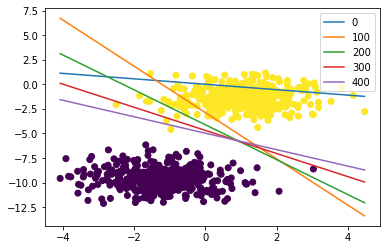

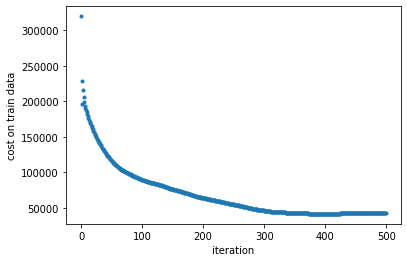

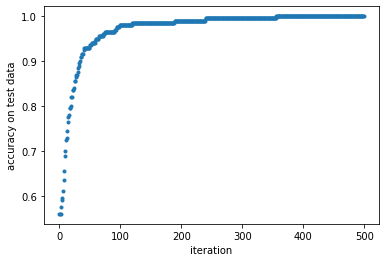

In [ ]:
x,y=datasets.make_blobs(n_samples=1000, n_features=2,centers=2, cluster_std=1.05, random_state=2)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
#fig, ax = plt.subplots()
linsvm=linearsvm(0.01,500)
#plotting
fig, ax = plt.subplots()
plt.scatter(xtrain[:,0], xtrain[:,1],marker="o", c=ytrain)

#linear svm
cost_list,accuracy=linsvm.fit(xtrain,ytrain,xtest,ytest)
print('costlist on train data at every iteration: ',cost_list)
print("weights,bias:",linsvm.weights,linsvm.bias)
print('accuracy on test data at every iteration:', accuracy)

#plot the cost and accuracy
plt.show()
plt.plot(cost_list,'.')
plt.xlabel('iteration')
plt.ylabel('cost on train data')
plt.show()
plt.plot(accuracy,'.')
plt.xlabel('iteration')
plt.ylabel('accuracy on test data')
plt.show()
#observe that the cost increases after certain iterations because it starts overfitting the training data
